In [1]:
# <h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
# <br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
# </br>
# <h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h1 style="text-align: center;">Курсовая работа по курсу:</h1>
# <h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: right;">Студент: Иванов Иван Иванович</h5>
# <h5 style="text-align: right;">Группа: С-04-15</h5>

# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: center;">Москва 2023</h5>

<h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
<br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
</br>
<h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

</br>
</br>
</br>
</br>
</br>

<h1 style="text-align: center;">Курсовая работа по курсу:</h1>
<h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

</br>
</br>
</br>
</br>
</br>

<h5 style="text-align: right;">Студент: Иванов Иван Иванович</h5>
<h5 style="text-align: right;">Группа: С-04-15</h5>

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

<h5 style="text-align: center;">Москва 2023</h5>

In [2]:
# ## Вариант №1

# ### $\space$ Дано:
# * $P_0 = 120 \space МПа $ - <Что это>
# * $t_0 = 565 ^\circ C$ -  <Что это>
# * $P_{пп} = 4.5 \space МПа$ -  <Что это>
# * $t_{пп} = 565 ^\circ C$ -  <Что это>
# * $P_{к} = 3.5 \space кПа$ -  <Что это>
# * $t_{п.в.} = 275^\circ C$ -  <Что это>

# * $N_{э} = 315 \space МВт$ -  <Что это>
# * z = 9 -  <Что это>

## Вариант №1

### $\space$ Дано:
* $P_0 = 120 \space МПа $ - <Что это>
* $t_0 = 565 ^\circ C$ -  <Что это>
* $P_{пп} = 4.5 \space МПа$ -  <Что это>
* $t_{пп} = 565 ^\circ C$ -  <Что это>
* $P_{к} = 3.5 \space кПа$ -  <Что это>
* $t_{п.в.} = 275^\circ C$ -  <Что это>

* $N_{э} = 315 \space МВт$ -  <Что это>
* z = 9 -  <Что это>

In [3]:
# # 1. Построение процесса расширения пара в турбине.
# Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

# 1. Построение процесса расширения пара в турбине. Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

<h1><span style="color:red">Warning</span><h5>Код ниже должен быть в `.py файле`<h5/>

In [4]:
# Просто вспомогательный код который нужен для отрисовки. Берется откуда-то еще в курсовом проекте

from typing import List, Tuple, Optional
from iapws import IAPWS97 as gas
from iapws import IAPWS97
import matplotlib.pyplot as plt
import numpy as np

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

p_0 = 25 * MPa #Начальное давление
t_0 = 560 #Начальная температура
p_middle = 3.62 * MPa #Давление промперегрева
t_middle = 565 #Температура промперегрева
p_k = 3.5 * kPa #Давление в конденсаторе
t_feed_water = 269
electrical_power = 830 * (10 ** 6)
z = 9
avg_diameter = 0.9
rotation_speed = 50
H_0 = 105
p_feed_water = 1.35 * p_0

internal_efficiency = 0.85
mechanical_efficiency = 0.994
generator_efficiency = 0.99

delta_p0 = 0.05 * p_0
delta_p_middle = 0.1 * p_middle
delta_p_1 = 0.03 * p_middle


real_p0 = p_0 - delta_p0
real_p1t = p_middle + delta_p_middle
real_p_middle = p_middle - delta_p_1

_point_0 = gas(P = p_0 * unit, T=to_kelvin(t_0))
point_0 = gas(P=real_p0 * unit, h=_point_0.h)
point_1t = gas(P=real_p1t * unit, s=_point_0.s)

hp_heat_drop = (_point_0.h - point_1t.h) * internal_efficiency
h_1 = point_0.h - hp_heat_drop
point_1 = gas(P=real_p1t * unit, h=h_1)

_point_middle = gas(P=p_middle * unit, T=to_kelvin(t_middle))
point_middle = gas(P=real_p_middle * unit, h=_point_middle.h)
point_2t = gas(P=p_k * unit, s=_point_middle.s)

lp_heat_drop = (_point_middle.h - point_2t.h) * internal_efficiency
h_2 = point_middle.h - lp_heat_drop
point_2 = gas(P=p_k * unit, h=h_2)

In [5]:
def legend_without_duplicate_labels(ax: plt.Axes) -> None:
    """
    Убирает дубликаты из легенды графика
    :param plt.Axes ax: AxesSubplot с отрисованными графиками
    :return None:
    """
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

    
def plot_process(ax: plt.Axes, points: List[IAPWS97], **kwargs) -> None:
    """
    Отрисовка процесса расширения по точкам
    :param plt.Axes ax: AxesSubplot с отрисованными графиками
    :param List[IAPWS97] points: Список инициализиованных точек процесса
    :param kwargs:
    :return None:
    """
    ax.plot([point.s for point in points], [point.h for point in points], **kwargs)

    
def get_isobar(point: IAPWS97) -> Tuple[List[float], List[float]]:
    """
    Собрать координаты изобары в hs осях
    :param IAPWS97 point: Точка для изобары
    :return Tuple[List[float], List[float]]:
    """
    s = point.s
    s_values = np.arange(s * 0.9, s * 1.1, 0.2 * s / 1000)
    h_values = [gas(P=point.P, s=_s).h for _s in s_values]
    return s_values, h_values


def _get_isoterm_steam(point: IAPWS97) -> Tuple[List[float], List[float]]:
    """
    Собрать координаты изотермы для пара в hs осях
    :param IAPWS97 point: Точка для изотермы
    :return Tuple[List[float], List[float]]:
    """
    t = point.T
    p = point.P
    s = point.s
    s_max = s * 1.2
    s_min = s * 0.8
    p_values = np.arange(p * 0.8, p * 1.2, 0.4 * p / 1000)
    h_values = np.array([gas(P=_p, T=t).h for _p in p_values])
    s_values = np.array([gas(P=_p, T=t).s for _p in p_values])
    mask = (s_values >= s_min) & (s_values <= s_max)
    return s_values[mask], h_values[mask]


def _get_isoterm_two_phases(point: IAPWS97) -> Tuple[List[float], List[float]]:
    """
    Собрать координаты изотермы для влажного пара в hs осях
    :param IAPWS97 point: Точка для изотермы
    :return Tuple[List[float], List[float]]:
    """
    x = point.x
    p = point.P
    x_values = np.arange(x * 0.9, min(x * 1.1, 1), (1 - x) / 1000)
    h_values = np.array([gas(P=p, x=_x).h for _x in x_values])
    s_values = np.array([gas(P=p, x=_x).s for _x in x_values])
    return s_values, h_values


def get_isoterm(point) -> Tuple[List[float], List[float]]:
    """
    Собрать координаты изотермы в hs осях
    :param IAPWS97 point: Точка для изотермы
    :return Tuple[List[float], List[float]]:
    """
    if point.phase == 'Two phases':
        return _get_isoterm_two_phases(point)
    return _get_isoterm_steam(point)


def plot_isolines(ax: plt.Axes, point: IAPWS97) -> None:
    """
    Отрисовка изобары и изотермы
    :param plt.Axes ax: AxesSubplot на котором изобразить линии
    :param IAPWS97 point: Точка для изображения изолиний
    :return None:
    """
    s_isobar, h_isobar = get_isobar(point)
    s_isoterm, h_isoterm = get_isoterm(point)
    ax.plot(s_isobar, h_isobar, color='green', label='Изобара')
    ax.plot(s_isoterm, h_isoterm, color='blue', label='Изотерма')

    
def plot_points(ax: plt.Axes, points: List[IAPWS97]) -> None:
    """
    Отрисовать точки на hs-диаграмме
    :param plt.Axes ax: AxesSubplot на котором изобразить точки
    :param List[IAPWS97] points: Точки для отображения
    return None
    """
    for point in points:
        ax.scatter(point.s, point.h, s=50, color="red")
        plot_isolines(ax, point)
        
def get_humidity_constant_line(
    point: IAPWS97,
    max_p: float,
    min_p: float,
    x: Optional[float]=None
) -> Tuple[List[float], List[float]]:
    """
    Собрать координаты линии с постоянной степенью сухости в hs осях
    :param IAPWS97 point: Точка для изолинии
    :param float max_p: Максимальное давление для линии
    :param float min_p: Минимальное давление для линии
    :param Optional[float] x: Степень сухости для отрисовки
    :return Tuple[List[float], List[float]]:
    """
    _x = x if x else point.x
    p_values = np.arange(min_p, max_p, (max_p - min_p) / 1000)
    h_values = np.array([gas(P=_p, x=_x).h for _p in p_values])
    s_values = np.array([gas(P=_p, x=_x).s for _p in p_values])
    return s_values, h_values

def plot_humidity_lines(ax: plt.Axes, points: List[IAPWS97]) -> None:
    """
    Отрисовать изолинии для степеней сухости на hs-диаграмме
    :param plt.Axes ax: AxesSubplot на котором изобразить изолинии
    :param List[IAPWS97] points: Точки для отображения
    return None
    """
    pressures = [point.P for point in points]
    min_pressure = min(pressures) if min(pressures) > 700/1e6 else 700/1e6
    max_pressure = max(pressures) if max(pressures) < 22 else 22
    for point in points:
        if point.phase == 'Two phases':
            s_values, h_values = get_humidity_constant_line(point, max_pressure, min_pressure, x=1)
            ax.plot(s_values, h_values, color="gray")
            s_values, h_values = get_humidity_constant_line(point, max_pressure, min_pressure)
            ax.plot(s_values, h_values, color="gray", label='Линия сухости')
            ax.text(s_values[10], h_values[10], f'x={round(point.x, 2)}')

def plot_hs_diagram(ax: plt.Axes, points: List[IAPWS97]) -> None:
    """
    Построить изобары и изотермы для переданных точек. Если степень сухости у точки не равна 1, то построется
    дополнительно линия соответствующей степени сухости
    :param plt.Axes ax: AxesSubplot на котором изобразить изолинии
    :param List[IAPWS97] points: Точки для отображения
    return None
    """
    plot_points(ax, points)
    plot_humidity_lines(ax, points)
    ax.set_xlabel(r"S, $\frac{кДж}{кг * K}$", fontsize=14)
    ax.set_ylabel(r"h, $\frac{кДж}{кг}$", fontsize=14)
    ax.set_title("HS-диаграмма процесса расширения", fontsize=18)
    ax.legend()
    ax.grid()
    legend_without_duplicate_labels(ax)

In [6]:
# Код ниже уже должен быть в ноутбуке

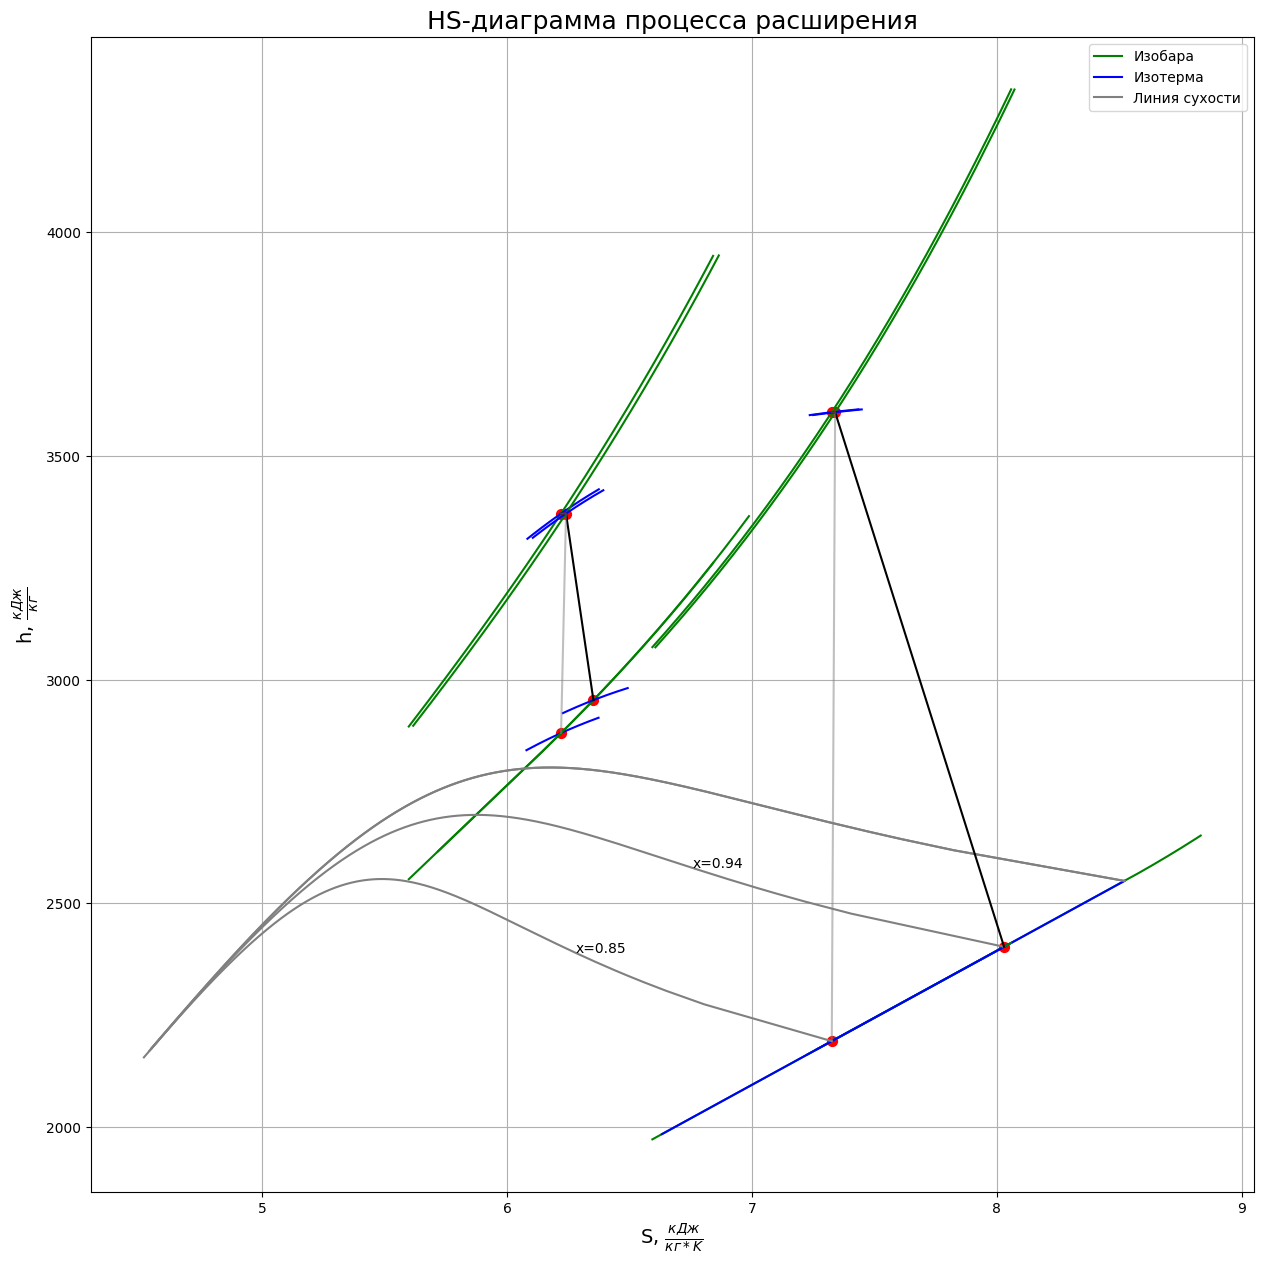

In [7]:
fig, ax  = plt.subplots(1, 1, figsize=(15, 15))
plot_hs_diagram(
    ax,
    points=[_point_0, point_0, point_1t, point_1, _point_middle, point_middle, point_2, point_2t]
)
plot_process(ax, points=[_point_0, point_0, point_1], color='black')
plot_process(ax, points=[_point_middle, point_middle, point_2], color='black')
plot_process(ax, points=[_point_0, point_0, point_1t], alpha=0.5, color='grey')
plot_process(ax, points=[_point_middle, point_middle, point_2t], alpha=0.5, color='grey')

## Далее в таком же стиле весь остальной курсовой проект